# 自选数据集，完成一次（数据分析+挖掘的综合实验）。
## 要求：
1、数据分析必须包含数据预处理、索引查询、分类分组汇总  
2、数据挖掘，需包含数据预处理（异常值、缺失值、标准化等）中的一个功能 + 一个挖掘模型  
3、用图表呈现分析结果  
4、用文字总结最终的分析结果  

## 数据分析
### 数据预处理
数据来源于Kaggle上的“Video_Games_Scales_as_at_22_Dec_2016”数据集

In [43]:
#准备数据：读入Video_Games_Sales_as_at_22_Dec_2016.csv的数据。
import pandas as pd
df=pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv',encoding='utf-8')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
#查看空值情况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [45]:
#处理缺失值
import numpy as np
df['Year_of_Release'].fillna(df['Year_of_Release'].median(), inplace=True) #用中位数填充缺失的年份
df['Critic_Score'].fillna(df['Critic_Score'].median(), inplace=True) #用中位数填充缺失的评分
df['User_Score'].replace('tbd',np.nan,inplace=True) #将'tbd'替换为NaN
df['User_Score']=df['User_Score'].astype(float) #将User_Score转换为float类型
df['User_Score'].fillna(df['User_Score'].median(),inplace=True) #用中位数填充缺失的用户评分
df['Rating'].fillna('Unknown', inplace=True) #用'Unknown'填充缺失的评分
#查看处理后的数据
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16719 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     16719 non-null  float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       16719 non-null  float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           16719 non-null  object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


C:\Users\lenovo\AppData\Local\Temp\ipykernel_21888\2031259183.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year_of_Release'].fillna(df['Year_of_Release'].median(), inplace=True) #用中位数填充缺失的年份
C:\Users\lenovo\AppData\Local\Temp\ipykernel_21888\2031259183.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [46]:
#删除剩余有确实值的行
df.dropna(inplace=True)
#查看处理后的数据
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7009 entries, 0 to 16709
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7009 non-null   object 
 1   Platform         7009 non-null   object 
 2   Year_of_Release  7009 non-null   float64
 3   Genre            7009 non-null   object 
 4   Publisher        7009 non-null   object 
 5   NA_Sales         7009 non-null   float64
 6   EU_Sales         7009 non-null   float64
 7   JP_Sales         7009 non-null   float64
 8   Other_Sales      7009 non-null   float64
 9   Global_Sales     7009 non-null   float64
 10  Critic_Score     7009 non-null   float64
 11  Critic_Count     7009 non-null   float64
 12  User_Score       7009 non-null   float64
 13  User_Count       7009 non-null   float64
 14  Developer        7009 non-null   object 
 15  Rating           7009 non-null   object 
dtypes: float64(10), object(6)
memory usage: 930.9+ KB


### 索引查询

In [47]:
#设置Name为索引
df.set_index('Name', inplace=True)
#查看处理后的数据
df.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Name,,,,,,,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [48]:
#查询特定游戏
df.loc[['Wii Sports','Grand Theft Auto V']]

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Name,,,,,,,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.81,2.19,0.00,0.47,5.48,97.0,14.0,7.9,764.0,Rockstar North,M
Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.39,0.69,0.00,0.09,1.17,96.0,57.0,7.9,3756.0,Rockstar North,M


In [49]:
#查询销量>20百万的游戏
df[df['Global_Sales'] > 20]

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Name,,,,,,,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E


### 分类分组汇总

In [50]:
#按平台分组统计
platform_stats=df.groupby('Platform').agg({
    'Global_Sales':['mean','sum','count'],
    'Critic_Score':'mean'
})
#查看平台统计结果
platform_stats.sort_values(by=('Global_Sales', 'sum'), ascending=False).head(10)

Global_Sales               Critic_Score
                 mean     sum count         mean
Platform                                        
PS2          0.829440  962.15  1160    69.524138
X360         0.981216  863.47   880    69.019318
PS3          1.005241  792.13   788    70.864213
Wii          1.367602  672.86   492    64.310976
DS           0.818806  384.02   469    66.567164
PS4          0.981165  244.31   249    72.132530
XB           0.374207  217.04   580    71.563793
PS           1.354167  211.25   156    74.128205
PC           0.276929  193.85   700    76.055714
PSP          0.484478  190.40   393    68.727735

## 数据挖掘
### 数据预处理

In [51]:
#特征标准化
from sklearn.preprocessing import StandardScaler
df=pd.get_dummies(df, columns=['Platform', 'Genre', 'Rating'], drop_first=False) 
scaler= StandardScaler()
numeric_cols=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Critic_Score','Critic_Count','User_Score', 'User_Count']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
#查看标准化后的数据
df.head()

,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,...,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T,Rating_Unknown
Name,,,,,,,,,,,,,,,,,,,,,
Wii Sports,2006.0,Nintendo,42.790456,42.275283,13.039169,31.375767,82.53,0.413577,1.158468,0.566920,...,True,False,False,True,False,False,False,False,False,False
Mario Kart Wii,2008.0,Nintendo,15.969619,18.434804,13.109518,12.029284,35.52,0.846130,2.306166,0.775275,...,False,False,False,True,False,False,False,False,False,False
Wii Sports Resort,2009.0,Nintendo,15.896509,15.741713,11.315610,10.754516,32.77,0.701946,2.306166,0.566920,...,True,False,False,True,False,False,False,False,False,False
New Super Mario Bros.,2006.0,Nintendo,11.374149,13.107487,22.641854,10.492063,29.80,1.350776,1.888822,0.914179,...,False,False,False,True,False,False,False,False,False,False
Wii Play,2006.0,Nintendo,14.173208,13.166352,10.084497,10.342090,28.92,-0.884085,0.636787,-0.405404,...,False,False,False,True,False,False,False,False,False,False


In [52]:
#取出特征属性
from sklearn.model_selection import train_test_split
X=df.drop(['Global_Sales','Publisher','Developer'],axis=1)
Y=df['Global_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 挖掘模型

In [53]:
#构建随机森林回归模型
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
#模型评估
from sklearn.metrics import mean_squared_error, r2_score
y_pred=rf.predict(X_test)
r2_score(Y_test, y_pred), mean_squared_error(Y_test, y_pred)

(0.9885343915786297, 0.02783817852353771)

## 画图表

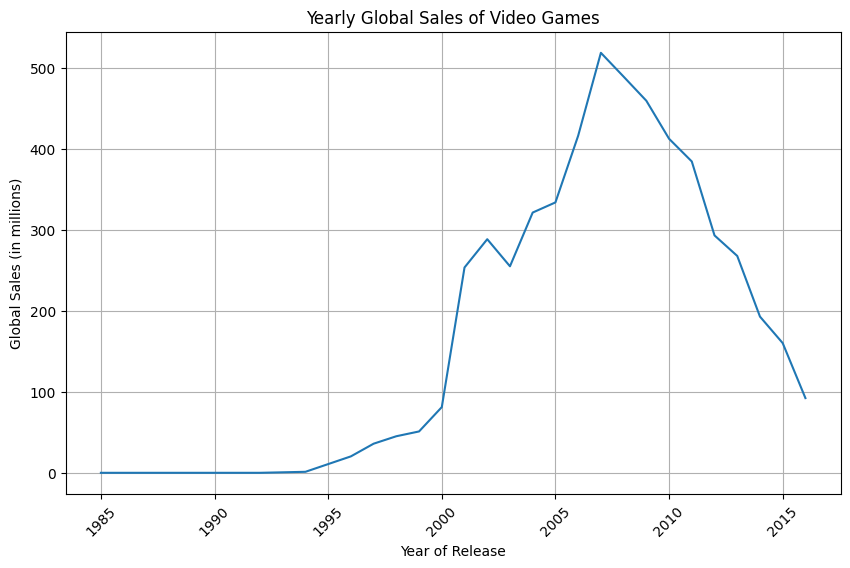

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
#全球销量随时间变化
plt.figure(figsize=(10, 6))
yearly_sales=df.groupby('Year_of_Release')['Global_Sales'].sum()
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Yearly Global Sales of Video Games')
plt.xlabel('Year of Release')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.grid()

In [55]:
df.columns

Index(['Year_of_Release', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Developer', 'Platform_3DS', 'Platform_DC',
       'Platform_DS', 'Platform_GBA', 'Platform_GC', 'Platform_PC',
       'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4',
       'Platform_PSP', 'Platform_PSV', 'Platform_Wii', 'Platform_WiiU',
       'Platform_X360', 'Platform_XB', 'Platform_XOne', 'Genre_Action',
       'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform',
       'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Rating_AO',
       'Rating_E', 'Rating_E10+', 'Rating_K-A', 'Rating_M', 'Rating_RP',
       'Rating_T', 'Rating_Unknown'],
      dtype='object')

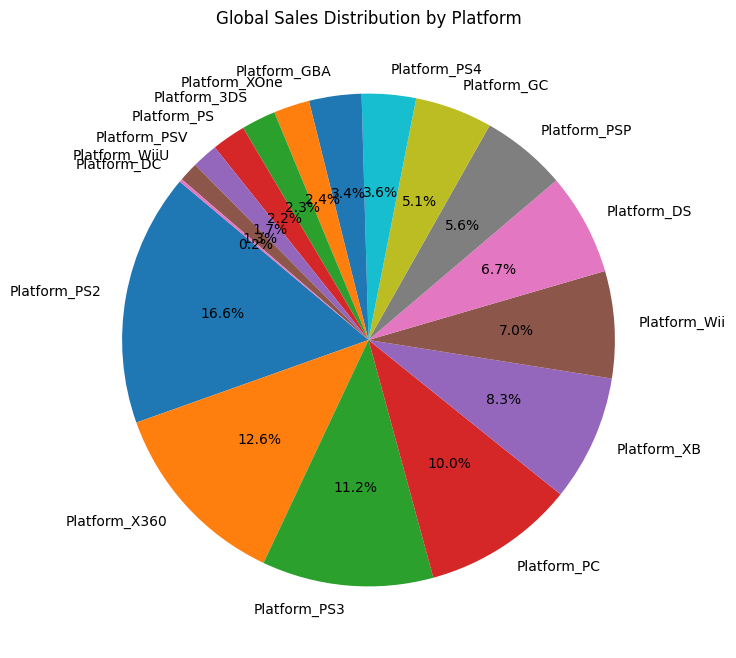

In [56]:
#各平台销量占比
platform_sales=df[[col for col in df.columns if col.startswith('Platform_')]].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
plt.pie(platform_sales, labels=platform_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Global Sales Distribution by Platform')
plt.show()

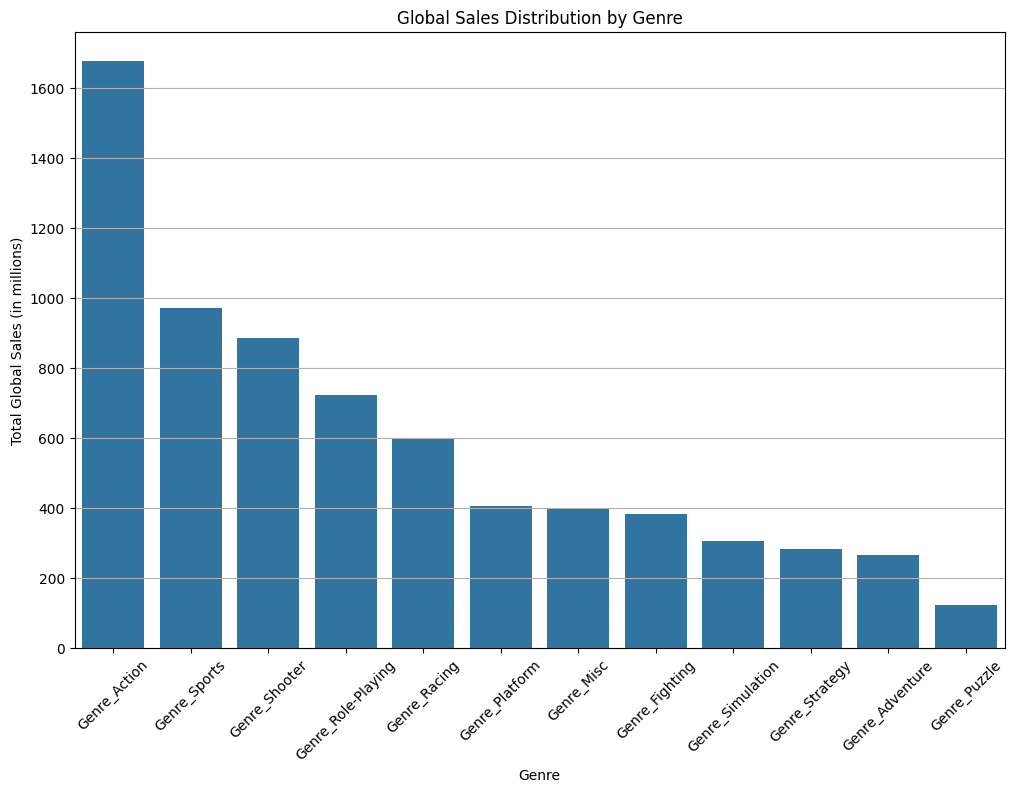

In [57]:
#游戏类型销售占比
plt.figure(figsize=(12, 8))
genre_sales=df[[col for col in df.columns if col.startswith('Genre_')]].sum().sort_values(ascending=False)
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Global Sales Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')

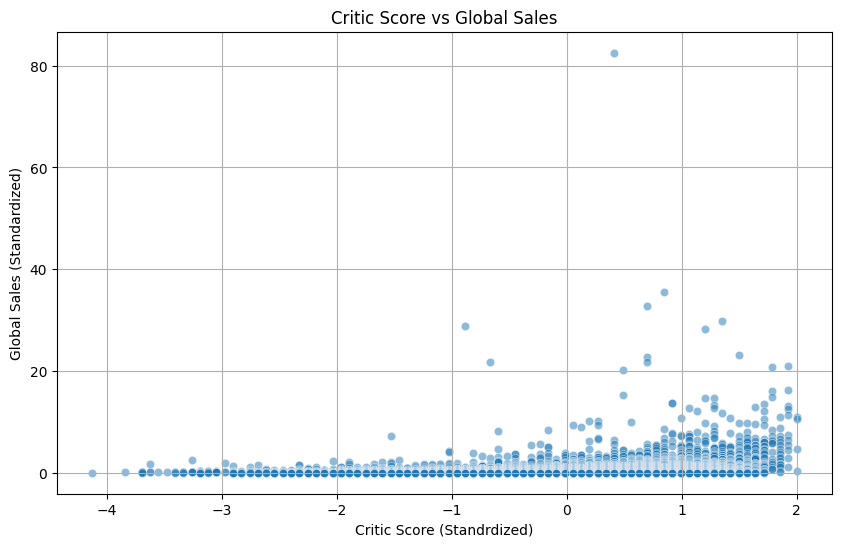

In [58]:
#评分与销量的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Critic_Score', y='Global_Sales', data=df, alpha=0.5)
plt.title('Critic Score vs Global Sales')
plt.xlabel('Critic Score (Standrdized)')
plt.ylabel('Global Sales (Standardized)')
plt.grid()

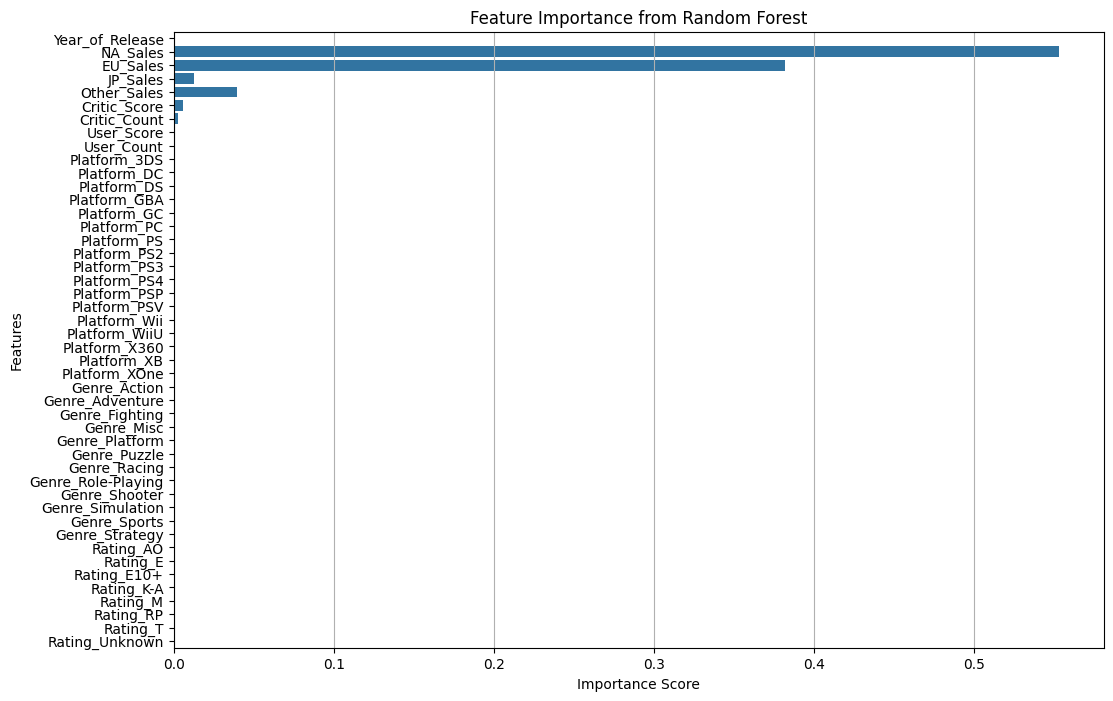

In [59]:
#随机森林特征重要性
plt.figure(figsize=(12, 8))
sns.barplot(x=rf.feature_importances_, y=X.columns)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x')